## Data types

Discrete Data:
    - integer based, often counts of some event.
    - How many purchases did a customer make in a yera?
    - How many times did I flif heads?
 Continous Data
     - Has an infinite number of possible values
     - How much time did it take for a user to check out?
     -  How much rain fell on a givern day?

Categorical Data:
    Qualitative data
    - Gender, Yes/ no, race, etc.

Ordinal:
    A miture of numerical and categorical
    - Categorical data that has mathematical meaning: 1 means worse movie than a 2
    
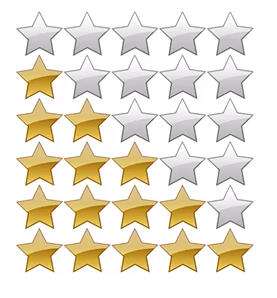

Mode: the most common number in a data set

### Variance:
Measeures how "pread-out" the data is.
Variance is the average of the squared differences from the mean
EXAMPLE:
Variance of set (1, 4, 5, 4, 8)
    - First find the mean (1+4+5+4+8)/5 = 4.4
    = Now find the differences from the mean: (1 - 4.4, 4- 4.4, 5 - 4.4, etc)
    - (-3.4, -0.4, 0.6, -0.4, 3.6)
    - find the squared differences: (11.56, 0.16, 0.36, 0.16, 12.96)
    - find the average of the squared differences:
    a~2 = (11.56 + 0.16 + 0.36 + 0.16 + 12.96) / 5 = 5.04

### Standard deviation:
Square room of the variance

Is usually used as a way to identify outliers (wartości odstajace). Data points that lie more than one standard deviation from the mean can be considered unusual.

You can talk about how extreme a data point is by talking about "how many sigmas" away from the mean iti is.
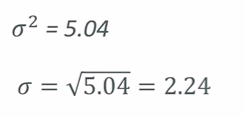

So, the standard variation of (1, 4, 5, 4, 8) is 2.24.

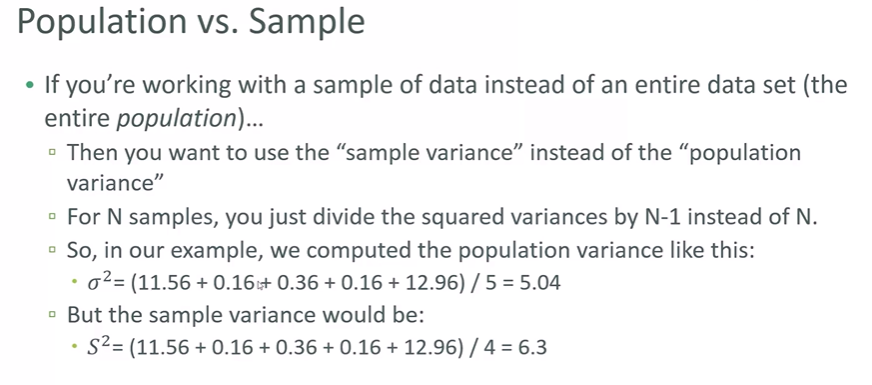

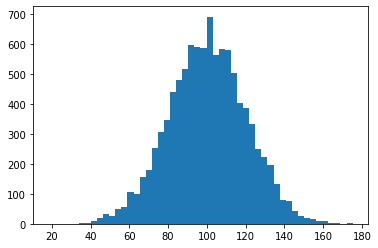

In [2]:
import numpy as np
import matplotlib.pyplot as plt

income = np.random.normal(100, 20.0, 10000)

plt.hist(income, 50)
plt.show()

In [3]:
income.std()

20.052036933618258

In [4]:
income.var()

402.0841851871907

### Normal distribution:
Gives you the probability of a data point falling within some given range of a given value

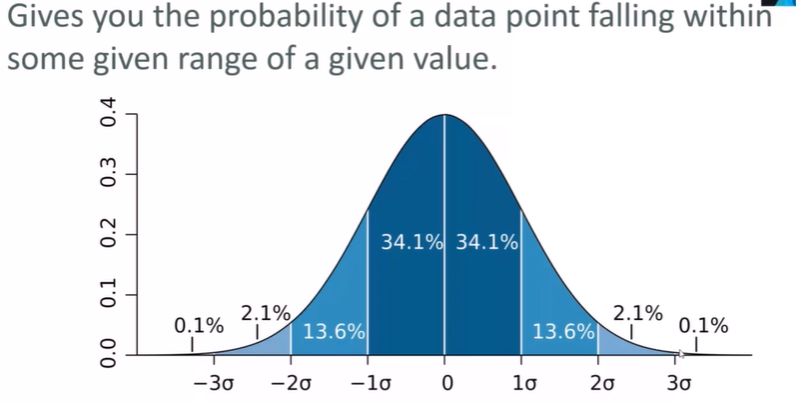

### Probability Mass Function:
The way we viualise the probbility of discreet data occurring

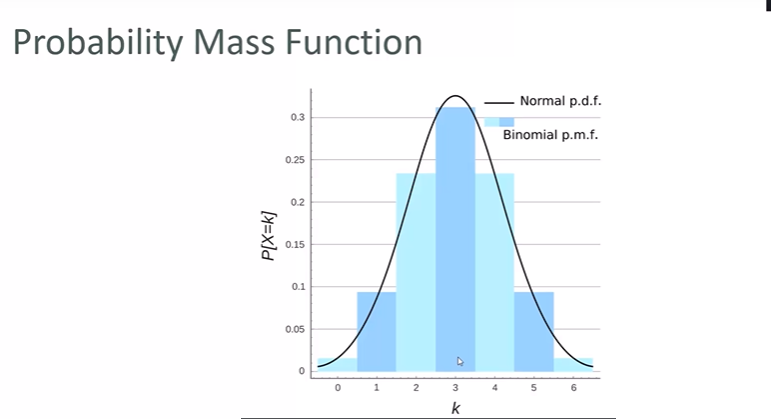

## Examples of Data Distributions


### Uniform Distribution

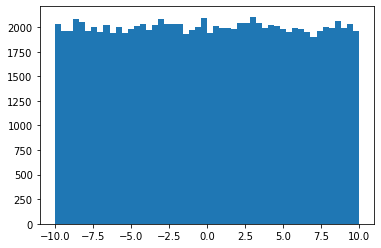

In [5]:
values = np.random.uniform(-10., 10., 100000)
plt.hist(values, 50)
plt.show()

### Normal / Gaussian

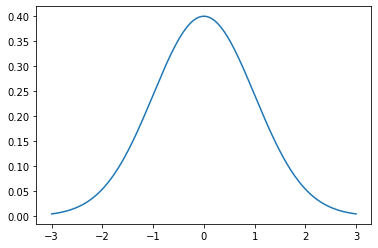

In [7]:
from scipy.stats import norm

x = np.arange(-3, 3, 0.001)
plt.plot(x, norm.pdf(x)) # pdf probability density function
plt.show()

Generate some random numbers with a normal distribution. "mu" is the desired mean, "sigma" is the standard deviation.

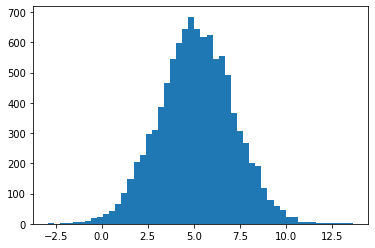

In [12]:
mu = 5.1
sigma = 2.0
values = np.random.normal(mu, sigma, 10000)
plt.hist(values, 50)
plt.show()

### Exponential PDF / "Power Law"

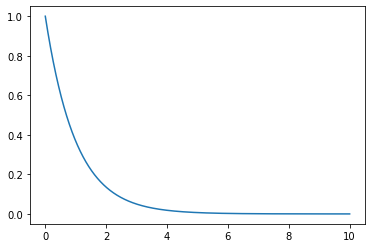

In [13]:
from scipy.stats import expon

x = np.arange(0, 10, 0.001)
plt.plot(x, expon.pdf(x))
plt.show()

## Binomial Probability Mass Function

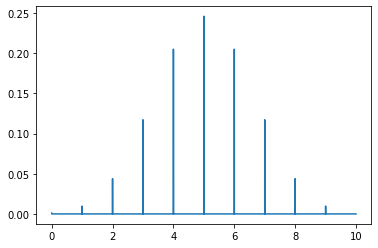

In [14]:
from scipy.stats import binom

n, p = 10, 0.5
x = np.arange(0, 10, 0.001)
plt.plot(x, binom.pmf(x, n, p))
plt.show()

## Poisson Probability Mass Funtion

My website gets on average 500 visits per day, what's the odds of getting 550?

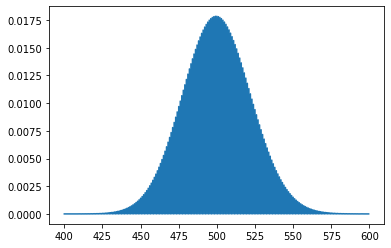

In [15]:
from scipy.stats import poisson

mu = 500
x = np.arange(400, 600, 0.5)
plt.plot(x, poisson.pmf(x, mu))
plt.show()

### Moments

Quantitative measures of the shape of a probability density function

Mathematically they are hard to wrap up:

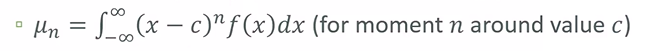

- The first moment is the mean.
- The second moment is the variance.
- Third moment is "skew"
    - How loopsided is the distribution?
    - A distribution with a longer tail on the left will be skewed left, and have a negative skew.
    
    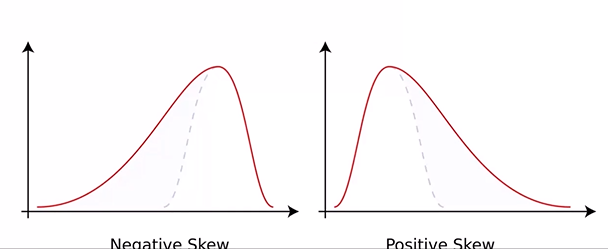
- The fourth moment is "kurtosis"
    - How thick is the tail, and how sharp is the peak, compared to a normal distribution?
    - F. e.: higher peaks have highter kurtosis

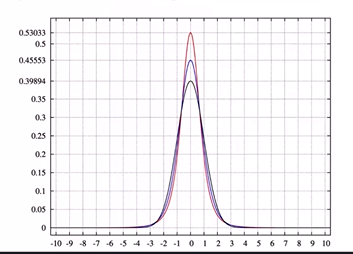

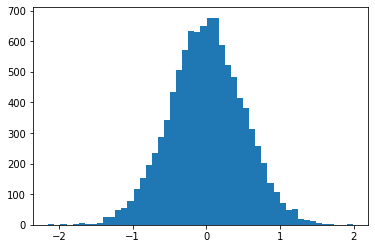

In [3]:
import numpy as np
import matplotlib.pyplot as plt

vals = np.random.normal(0, 0.5, 10000)

plt.hist(vals, 50)
plt.show()

In [4]:
# FIRST MOMENT: MEAN - data should be close to 0
np.mean(vals)

0.0008176312786928964

In [5]:
# SECOND MOMENT: VARIANCE
np.var(vals)

0.25131555488252116

In [7]:
# THIRD MOMENT: SKEW - data is nicely centered around 0, it should be almost 0
import scipy.stats as sp
sp.skew(vals)

-0.03052643631658173

In [8]:
# FOURTH MOMENT: KURTOSIS - describes the shape of the tail. For a normal distribution, this is 0
sp.kurtosis(vals)

0.0302581860757547

### Covariance

Measures how two variables vary in tandem from their means.
- think of the data sets for the two variables as high-dimensional vetors
- convert these to vectors of variances from the mean
- take the dot product (cosine of the angle between them) of the two vectors
- divide by the sample size

### Correlation

Just divide the covariance by the stanard deviations of both variables, and that normalizes things
- so a correlation of -1 means a perfect inverse correlation
- correlation of 0: no correlation
- correlation 1: perfect correlation

In [13]:
def de_mean(x):
    xmean = np.mean(x)
    return [xi - xmean for xi in x]

def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n-1)

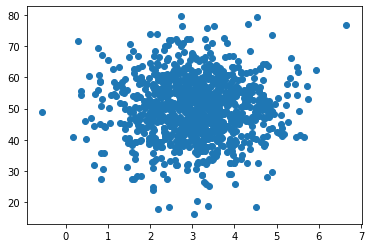

In [14]:
pageSpeed = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000)

plt.scatter(pageSpeed, purchaseAmount)
plt.show()

In [15]:
covariance(pageSpeed, purchaseAmount)

0.015213838310440675

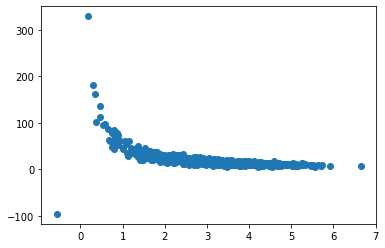

In [16]:
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeed

plt.scatter(pageSpeed, purchaseAmount)
plt.show()

In [17]:
covariance(pageSpeed, purchaseAmount)

-9.760127236964708

In [18]:
def correlation(x,y ):
    stddevx = x.std()
    stddevy = y.std()
    return covariance(x, y) / stddevx / stddevy

In [19]:
correlation(pageSpeed, purchaseAmount)

-0.5682282401242628

In [20]:
np.corrcoef(pageSpeed, purchaseAmount)

array([[ 1.        , -0.56766001],
       [-0.56766001,  1.        ]])

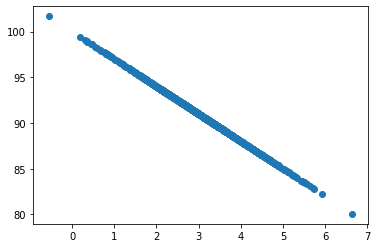

In [21]:
purchaseAmount = 100 - pageSpeed * 3

plt.scatter(pageSpeed, purchaseAmount)
plt.show()

In [22]:
correlation(pageSpeed, purchaseAmount)

-1.001001001001001

### Conditional Probability

- If I have two events that depend on each other, what's the probability that both will occur?
- Notation: P(A, B) is the probability of A and B both occuring
- P(B|A): Probability of B given that A has occurred

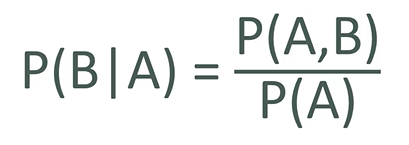

EXAMPLE:
    I give my student two tests.
    
    60% of my students passed bth tests, but the first test was easier - 80% passed that one.
    
    What percentage of students who passed the first test also passed the second?
    
   A = passing the firt test, B = passing the second test
   
   So we are asking for P(B|A) - the probability of B given A
   
   P(B|A) = P(A, B) / P(A) = 0.6 / 0.8 = 0.75
   
   **ANSWER:** 75% of students who passed the first test passed the second

In [28]:
totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0

for _ in range(100000):
    ageDecade = np.random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = float(ageDecade) / 100.0
    totals[ageDecade] += 1
    if np.random.random() < purchaseProbability:
        totalPurchases += 1
        purchases[ageDecade] += 1

In [29]:
totals

{20: 16593, 30: 16697, 40: 16526, 50: 16659, 60: 16808, 70: 16717}

In [30]:
purchases

{20: 3372, 30: 4987, 40: 6652, 50: 8284, 60: 10125, 70: 11699}

In [31]:
totalPurchases

45119

First let's compute P(E|F)

E = purchase

F = "you're in your 30's"

The probability of someone in their 30's buying something is just the percentage of how many 30 y.o. bought something

In [33]:
PEF = float(purchases[30] / totals[30])
PEF

0.29867640893573694

P(F) is a probability of being 30 in this dataset:

In [35]:
PF = totals[30] / 100_000
PF

0.16697

PE is the overall probability of buing something

In [37]:
PE = totalPurchases / 100_000
PE

0.45119

If E and F were independent, then we would expect P(E|F) to be about the same as P(E).

But they are not.

P(E, F) is different from P(E|F).

P(E, F) would be the probability of both being in your 30's and buing something out of the total population - not just the people in their 30s

In [38]:
PEF2 = purchases[30] / 100_000
PEF2

0.04987

Product of P(E) and P(F), P(E)P(F)

In [39]:
PF * PE

0.0753351943

Sometimg you may learn in statics is that P(E, F) = P(E)P(F)

But this assumes E and F are independent.

We've found that P(E, F) is about 0.5 while P(E)P(F) is about 0.75.

So when E and F are dependent and we hava a conditional probability going on, we can;t just say that P(E, F) = P(E)P(F)

We can also check that P(E|F) = P(E, F) / P(F)

In [40]:
(purchases[30] / 100_000) / PF

0.29867640893573694

In [45]:
totals = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
purchases = {20:0, 30:0, 40:0, 50:0, 60:0, 70:0}
totalPurchases = 0

for _ in range(100000):
    ageDecade = np.random.choice([20, 30, 40, 50, 60, 70])
    purchaseProbability = 0.4
    totals[ageDecade] += 1
    if np.random.random() < purchaseProbability:
        totalPurchases += 1
        purchases[ageDecade] += 1

In [46]:
purchases[70] / totalPurchases

0.16670408341440296

In [48]:
purchases[70] / totals[70]

0.4003234695100036

In [47]:
purchases[20] / totalPurchases

0.16717802888572925

In [49]:
purchases[20] / totals[20]

0.4009332376166547

### Bayes' Theorem

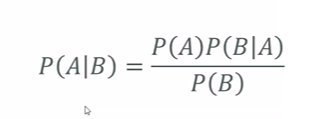

The probability of A given B, is the probability of A times the probability of B given A ver the probability of B.

Prawdopodobieństwo A danego B jest prawdopodobieństwem A razy prawdopodobieństwo B przy danym A w stosunku do prawdopodobieństwa B.

The key insight is that the probability of something that depends on B depends very much on the base probability of A and B.

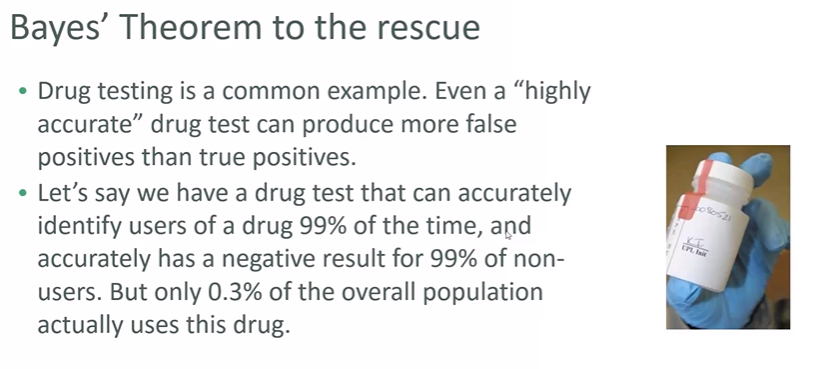

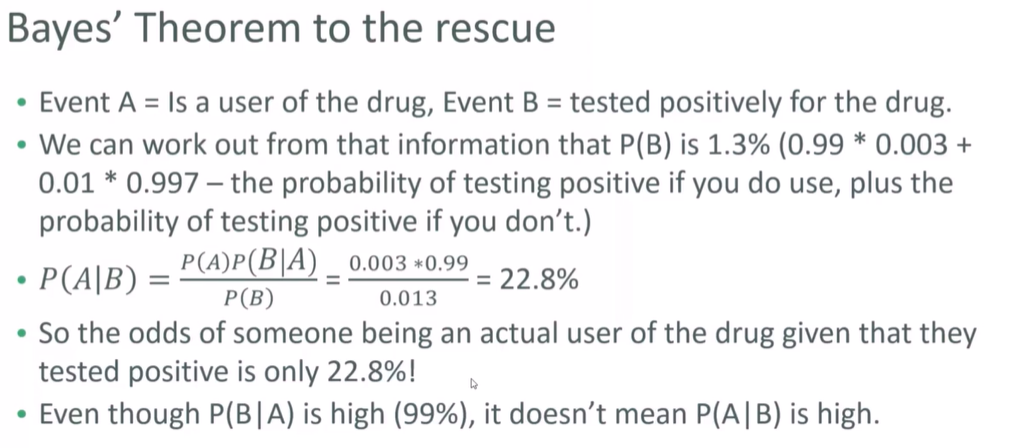